In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from plotData import *
from computeCost import *
from gradientDescent import *

In [2]:
data=pd.read_csv('data_uni-linear.txt',sep=',',header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
X,y=data.values[:,0][:,np.newaxis],data.values[:,1][:,np.newaxis]

# VISUALIZE DATA

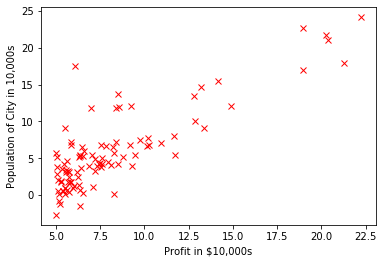

In [5]:
plotData(X,y)

# GRADIENT DESCENT

In [6]:
# number of training examples
m=X.size
# Add a column of ones to x
X_ones=np.column_stack((np.ones(m),X))
# initialize fitting parameters
theta_ini=np.zeros((2,1))
# Some gradient descent settings
iterations=1500
alpha=0.01

## COST FUNCTION

In [7]:
# compute and display initial cost
J=computeCost(X_ones,y,theta_ini)
print('With theta = [0 ; 0]\nCost computed = %f'%J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07


In [8]:
# further testing of the cost function
J=computeCost(X_ones,y,np.array([[-1],[2]]))
print('With theta = [-1 ; 2]\nCost computed = %f'%J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


## GRADIENT DESCENT

In [9]:
# run gradient descent
theta,J_history=gradientDescent(X_ones,y,theta_ini,alpha,iterations)
# print gradient descent result
print('Theta found by gradient descent:\n{},\n{}'.format(theta[0],theta[1]))
print('Expected theta values (approx)\n-3.6303\n  1.1664')
print('J final:\n{}'.format(J_history[-1]))

Theta found by gradient descent:
[-3.63029144],
[1.16636235]
Expected theta values (approx)
-3.6303
  1.1664
J final:
[4.48338826]


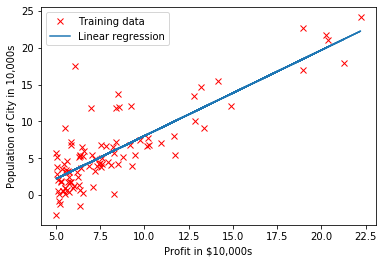

In [10]:
# Plot the linear fit
data=plotData(X,y)
regression,=plt.plot(X,X_ones@theta)
plt.legend([data,regression],['Training data','Linear regression'])

In [11]:
# Predict values for population sizes of 35,000 and 70,000
predict1=np.asscalar([[1,3.5]]@theta)
print('For population = 35,000, we predict a profit of {}\n'.format(predict1*10000))
predict2=np.asscalar([[1,7]]@theta)
print('For population = 70,000, we predict a profit of {}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.767867701763

For population = 70,000, we predict a profit of 45342.450129447134



# VISUALIZE COST FUNCTION

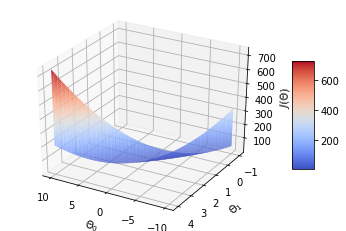

In [12]:
# Grid over which we will calculate J
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
# initialize J_vals to a matrix of 0's
J_vals=np.zeros((theta0_vals.size,theta1_vals.size))
# Fill out J_vals
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        J_vals[i,j]=computeCost(X_ones,y,np.array([[theta0_vals[i]],[theta1_vals[j]]]))
# Surface plot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,120)

Text(0, 0.5, '$\\Theta_1$')

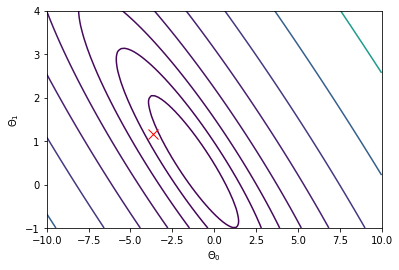

In [13]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2,3,20))
plt.plot(theta[0],theta[1],'rx',markerSize=10,lineWidth=2)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
# https://scipython.com/blog/visualizing-the-gradient-descent-method/

Text(0.5, 1.0, 'Cost function using Gradient Descent')

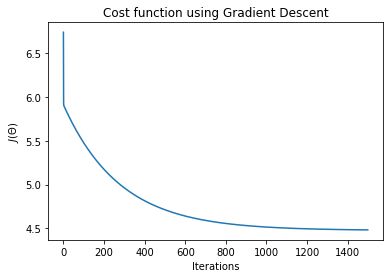

In [14]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

# ADVANCED OPTIMIZATION ALGORITHMS

## TRAIN SET PERFORMANCE

In [15]:
linReg=LinearRegression()
linReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Theta computed by sklearn LinearRegression: %.2f, %.2f' % (linReg.intercept_,linReg.coef_))
print('For population = 35,000, we predict a profit of %.2f' % (linReg.predict(np.array([35000/10000])[:,np.newaxis])*10000))
print('For population = 70,000, we predict a profit of %.2f' % (linReg.predict(np.array([70000/10000])[:,np.newaxis])*10000))

Theta computed by sklearn LinearRegression: -3.90, 1.19
For population = 35,000, we predict a profit of 2798.37
For population = 70,000, we predict a profit of 44554.55


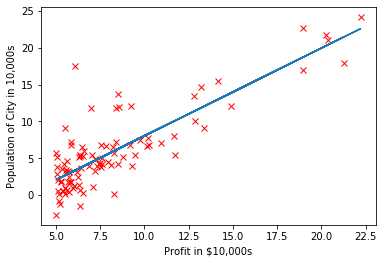

In [17]:
plotData(X,y)
plt.plot(X,linReg.predict(X))

In [18]:
r2_score(y,linReg.predict(X))

0.7020315537841397

## TEST SET PERFORMANCE

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [21]:
linRegSplit=LinearRegression()
linRegSplit.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Theta computed by sklearn LinearRegression: [%.2f %.2f]' % (linRegSplit.coef_, linRegSplit.intercept_) )
print('For population = 35,000, we predict a profit of %.2f' % (linRegSplit.predict(np.array([35000/10000])[:,np.newaxis])*10000))
print('For population = 70,000, we predict a profit of %.2f' % (linRegSplit.predict(np.array([70000/10000])[:,np.newaxis])*10000))

Theta computed by sklearn LinearRegression: [1.08 -3.10]
For population = 35,000, we predict a profit of 6799.78
For population = 70,000, we predict a profit of 44593.38


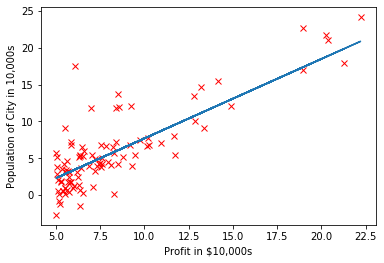

In [23]:
plotData(X,y)
plt.plot(X,linRegSplit.predict(X))

In [24]:
y_pred=linRegSplit.predict(X_test)
r2_score(y_test,y_pred)

0.7571650285777297